# HASOC English Data Visualisation

This notebook contains the visualisations of Hindi data in HASOC 2019.

In [1]:
import pandas as pd

full = pd.read_csv("data/hindi_dataset.tsv", sep='\t')
full[:10]

text_id                                               text task_1  \
0  hasoc_hi_5556  बांग्लादेश की शानदार वापसी, भारत को 314 रन पर ...    NOT   
1  hasoc_hi_5648  सब रंडी नाच देखने मे व्यस्त जैसे ही कोई #शांती...    HOF   
2   hasoc_hi_164  तुम जैसे हरामियों के लिए बस जूतों की कमी है शु...    HOF   
3  hasoc_hi_3530  बीजेपी MLA आकाश विजयवर्गीय जेल से रिहा, जमानत ...    NOT   
4  hasoc_hi_5206  चमकी बुखार: विधानसभा परिसर में आरजेडी का प्रदर...    NOT   
5  hasoc_hi_5121  मुंबई में बारिश से लोगों को काफी समस्या हो रही है    NOT   
6  hasoc_hi_7142  Ahmed's dad:-- beta aaj teri mammy kyu nahi ba...    NOT   
7  hasoc_hi_4321  5 लाख मुसलमान उर्स में, अजमेर की दरगाह पर आते ...    NOT   
8  hasoc_hi_4674  Do mahashaktiyan mili hain, charo taraf khusi ...    NOT   
9  hasoc_hi_1637  Chants of 'Jai Sri Ram' as Owaisi takes oath: ...    NOT   

  task_2 task_3  
0   NONE   NONE  
1   PRFN    UNT  
2   PRFN    TIN  
3   NONE   NONE  
4   NONE   NONE  
5   NONE   NONE  
6   NONE   NONE  
7   NONE   NONE  
8   NONE   NONE  
9   NONE   NONE

## Sub-task A
Sub-task A focus on Hate speech and Offensive language identification offered for English, German, Hindi. Sub-task A is coarse-grained binary classification in which participating system are required to classify tweets into two class, namely: Hate and Offensive (HOF) and Non- Hate and offensive (NOT).

* (NOT) Non Hate-Offensive - This post does not contain any Hate speech, offensive content.
* (HOF) Hate and Offensive - This post contains Hate, offensive, and profane content.

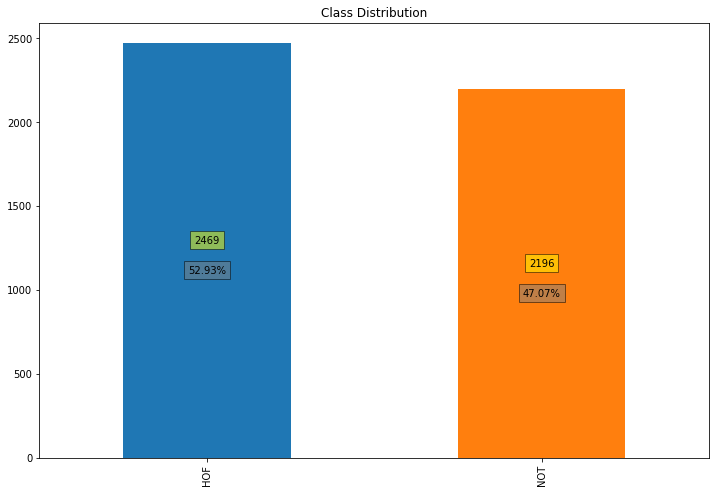

In [3]:
from visualisation import plot_data

plot_data(full, "task_1")

In [4]:
from preprocessing import remove_url

TEXT_COLUMN = "text"
full[TEXT_COLUMN] = full[TEXT_COLUMN].apply(lambda x: remove_url(x))

In [5]:
from visualisation import plot_hindi_word_cloud

NOT = full[(full['task_1'] == 'NOT')]
HOF = full[(full['task_1'] == 'HOF')]



word cloud for not offensive posts

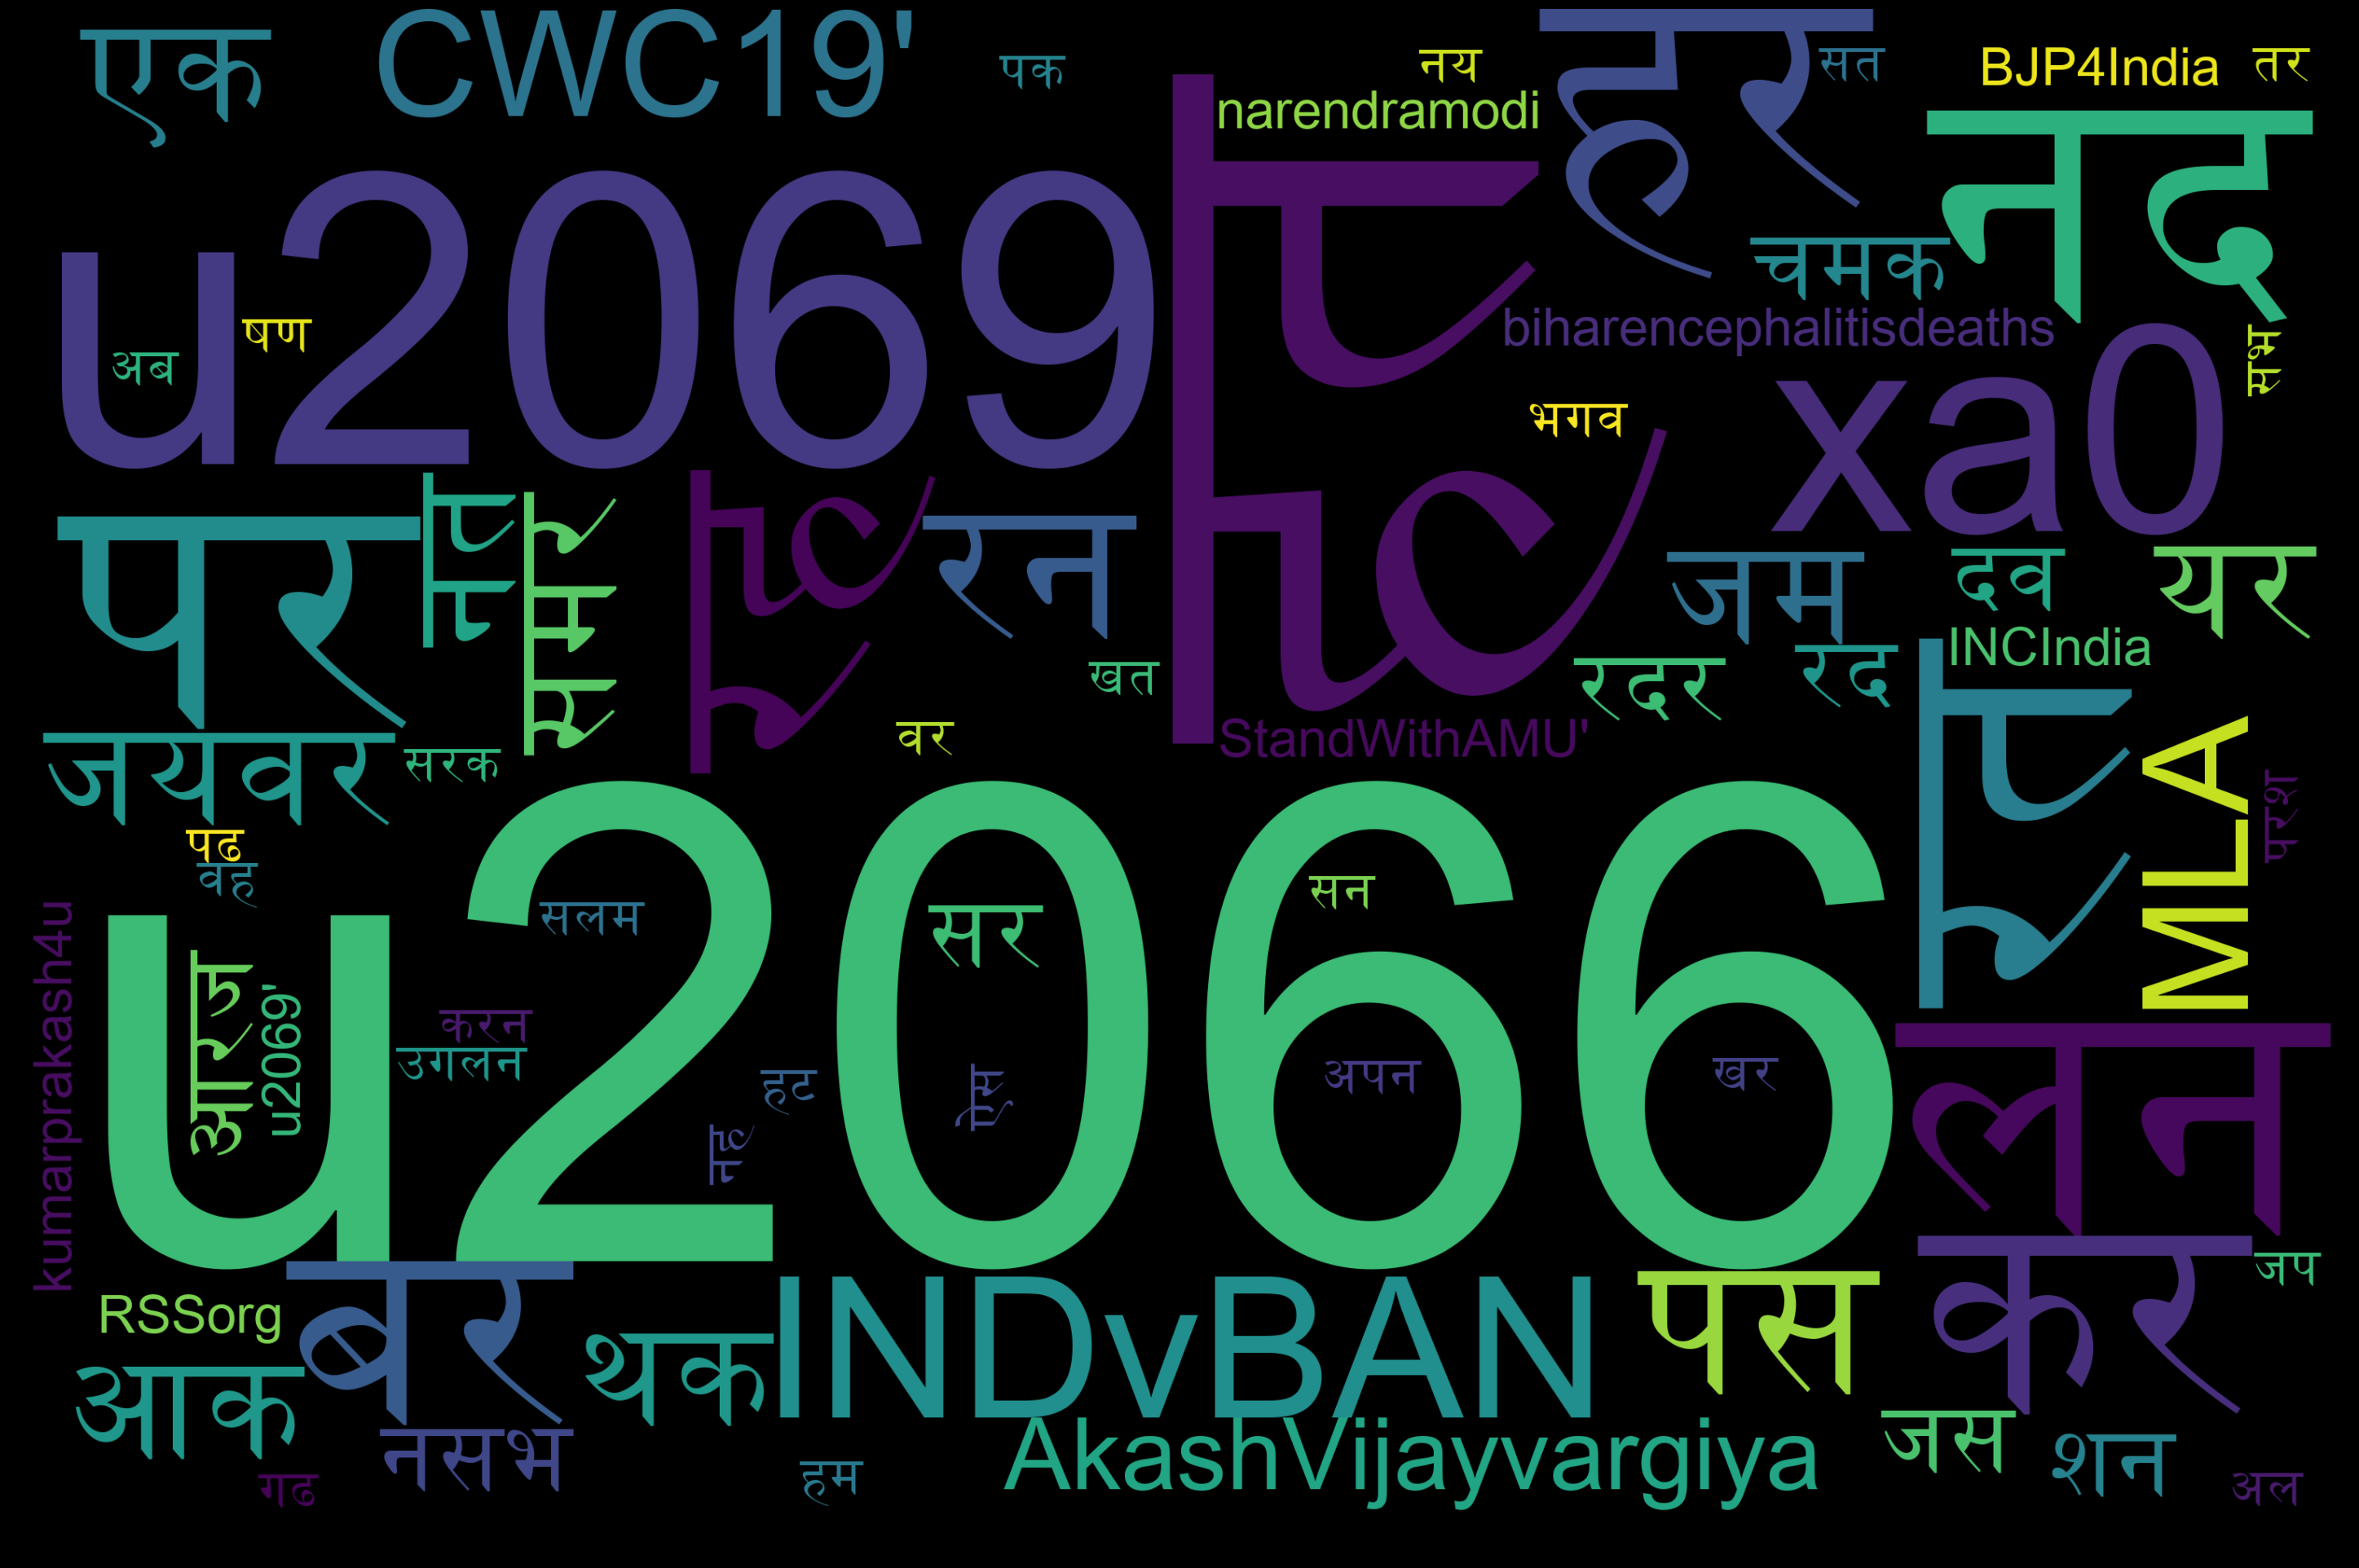

In [6]:
plot_hindi_word_cloud(NOT)



word cloud for offensive posts

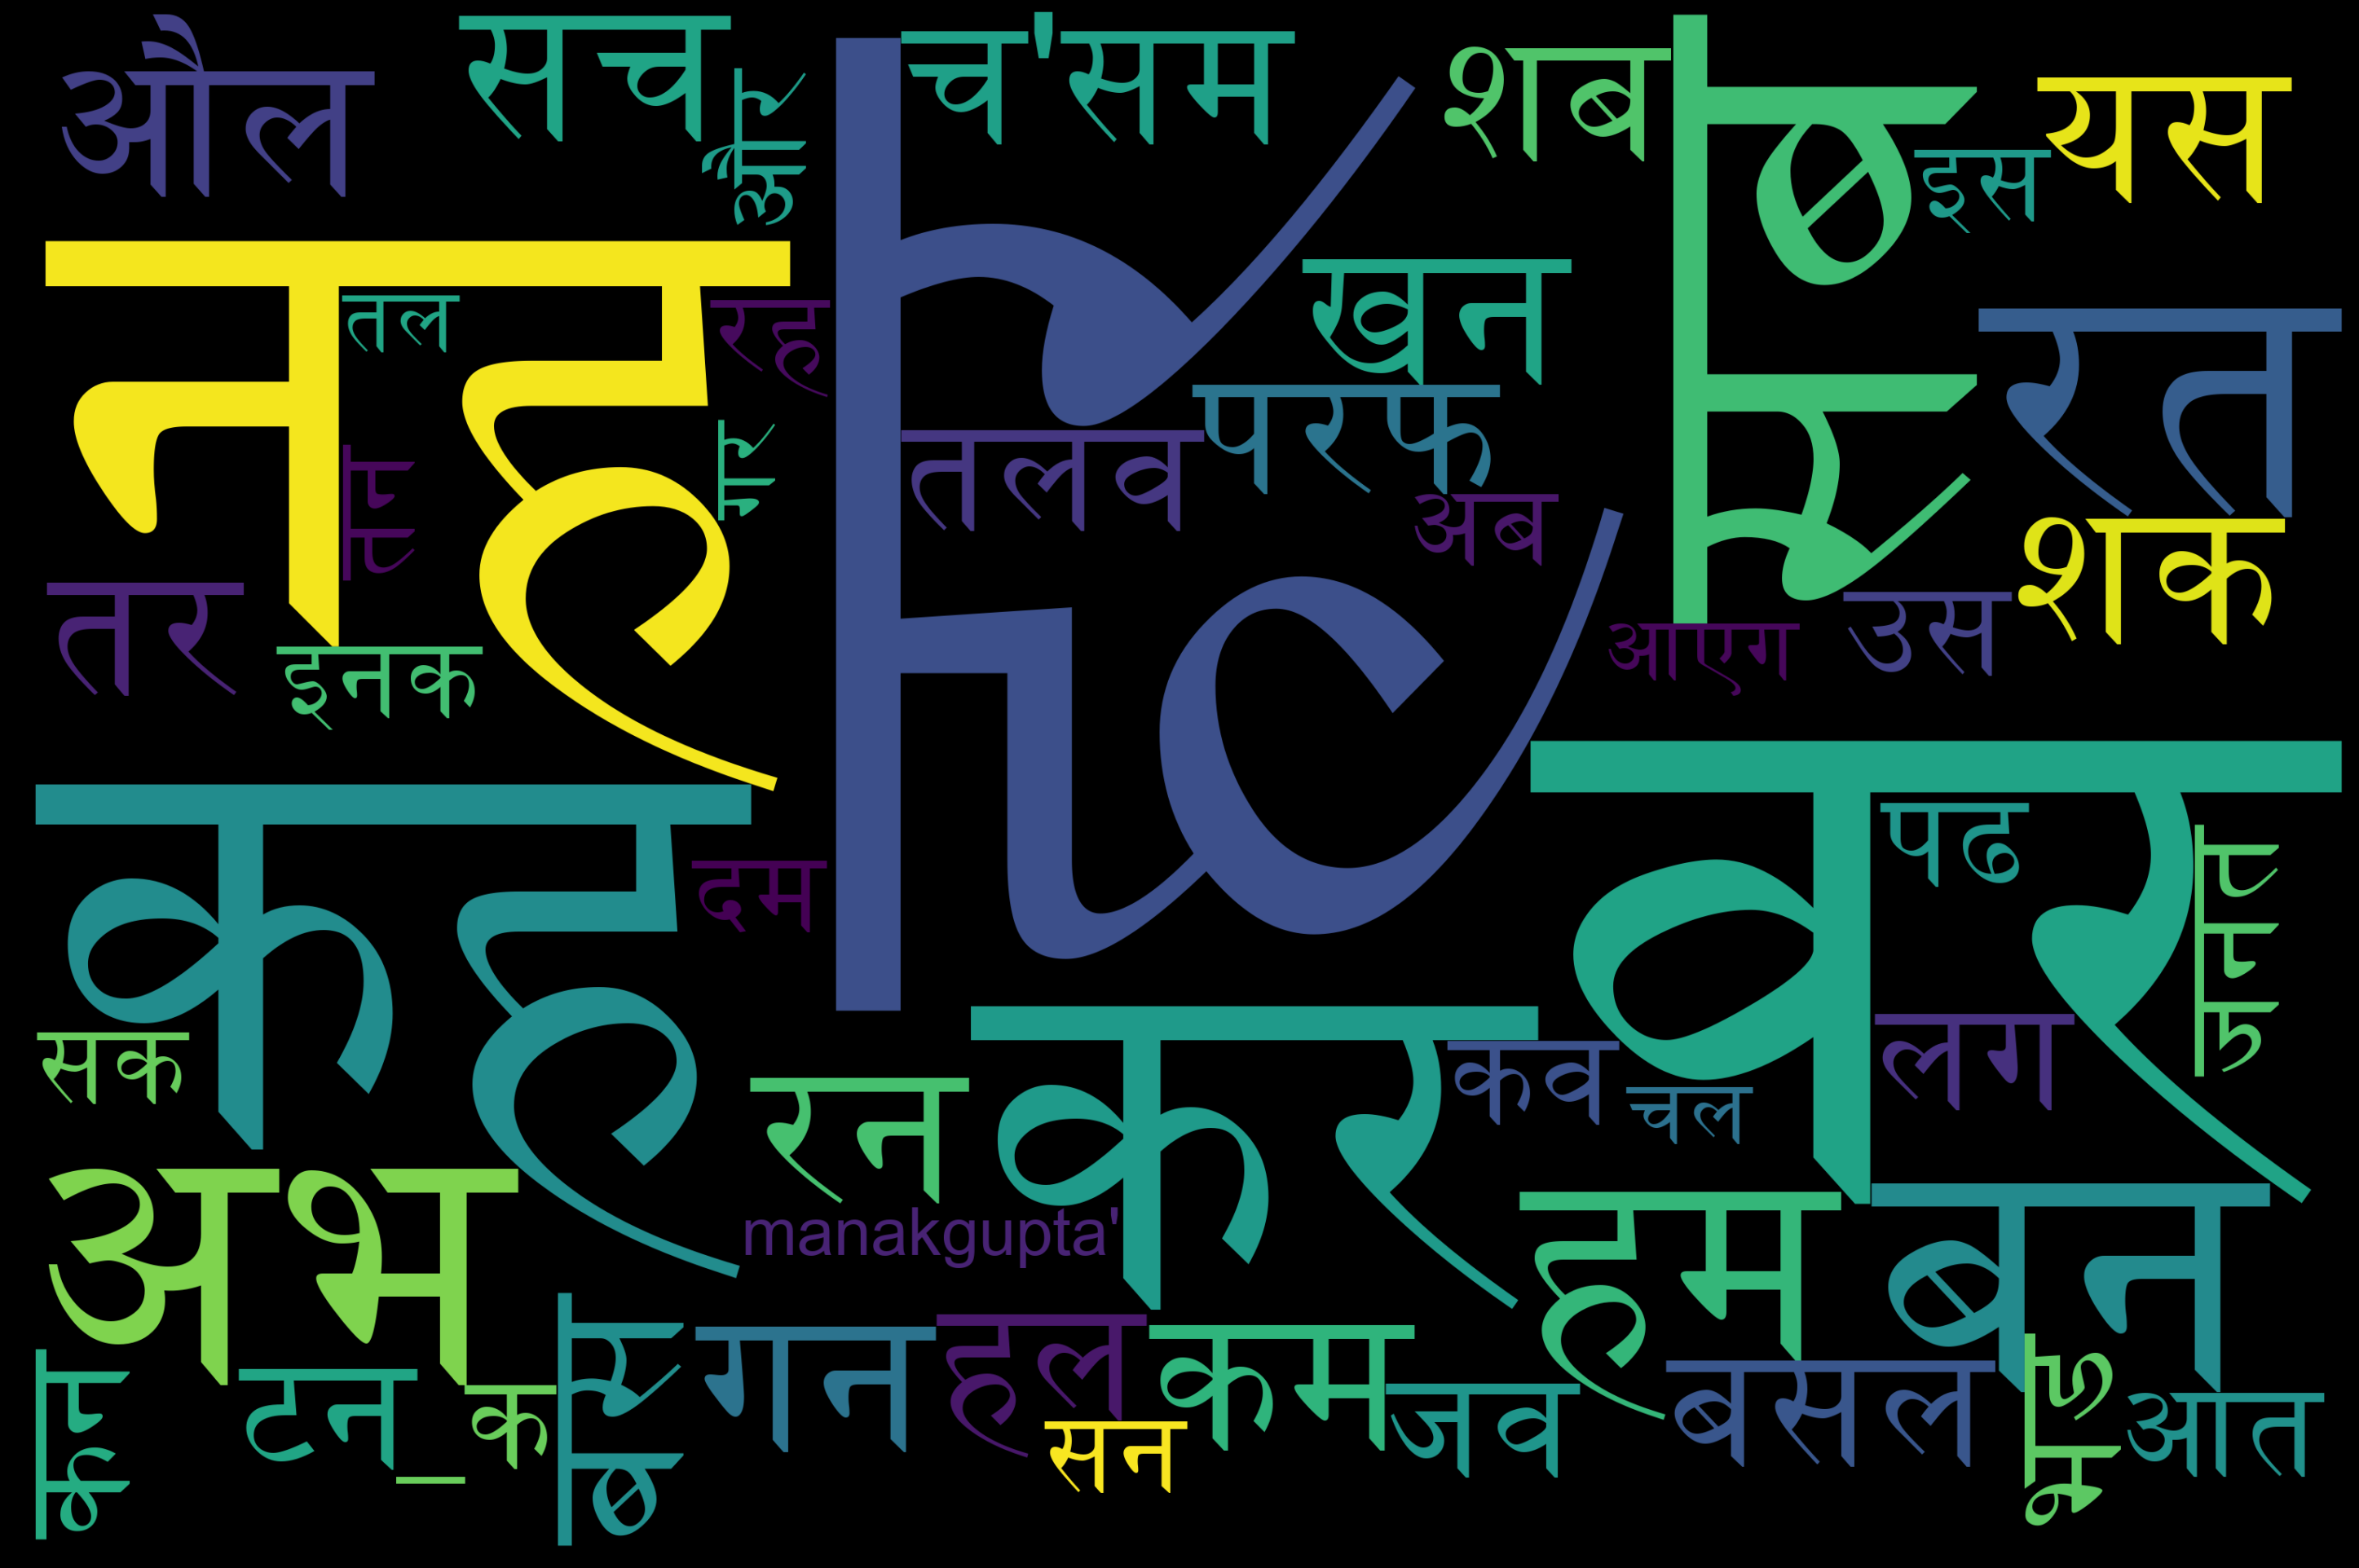

In [8]:
plot_hindi_word_cloud(HOF)

## Sub-task B :-
Sub-task B is a fine-grained classification. Hate-speech and offensive posts from the sub-task A are further classified into three categories.

* (HATE) Hate speech :- Posts under this class contain Hate speech content.
* (OFFN) Offenive :- Posts under this class contain offensive content.
* (PRFN) Profane :- These posts contain profane words.

In [9]:
is_hof = full['task_1'] == 'HOF'
hof = full[is_hof]
hof[:10]

text_id                                               text task_1  \
1   hasoc_hi_5648  सब रंडी नाच देखने मे व्यस्त जैसे ही कोई #शांती...    HOF   
2    hasoc_hi_164  तुम जैसे हरामियों के लिए बस जूतों की कमी है शु...    HOF   
18  hasoc_hi_6865  #नीच'समानार्थी शब्द #मोदी' दिला तर चालेल की, ल...    HOF   
20  hasoc_hi_3763  इस मादरचोद को धुण्डके गांड मे गोली मरो  @Uppolice    HOF   
22  hasoc_hi_5898  You cry in front of ur god  Of being deceived ...    HOF   
26  hasoc_hi_1944  हद तो तब हो जाती हैं  जब आरक्षण का लाभ लेने वा...    HOF   
29  hasoc_hi_4604               प्लीज कॉल मेरी जबरदस्ती चुदाई करो ना    HOF   
33  hasoc_hi_7490  अमित शाह से बाद में फिर तू पूछेगी यह क्या कर द...    HOF   
40  hasoc_hi_4297  नफरत करनी है उतनी कर लो रंडवो बाजारू रंडी कि औ...    HOF   
51  hasoc_hi_4243  बेटे तेरे जैसे मेरी कार के टायर साफ करते है 40...    HOF   

   task_2 task_3  
1    PRFN    UNT  
2    PRFN    TIN  
18   OFFN    TIN  
20   PRFN    UNT  
22   PRFN    UNT  
26   HATE    TIN  
29   PRFN    UNT  
33   PRFN    UNT  
40   PRFN    UNT  
51   PRFN    UNT

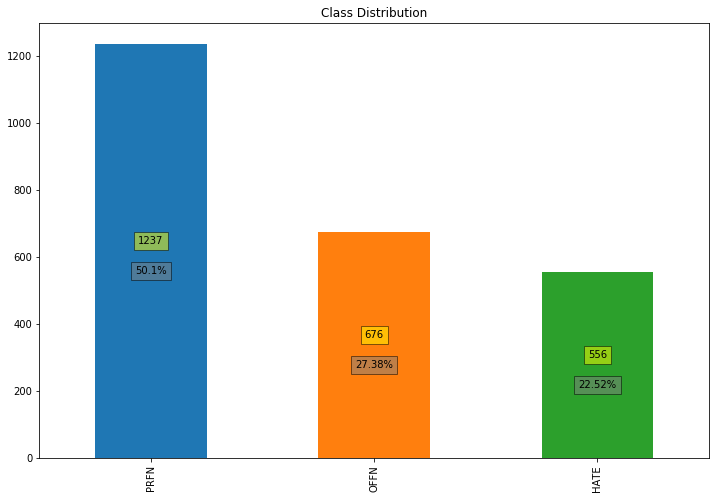

In [10]:
plot_data(hof, "task_2")

In [11]:
HATE = hof[(hof['task_2'] == 'HATE')]
PRFN = hof[(hof['task_2'] == 'PRFN')]
OFFN = hof[(hof['task_2'] == 'OFFN')]

word cloud for hate speech content

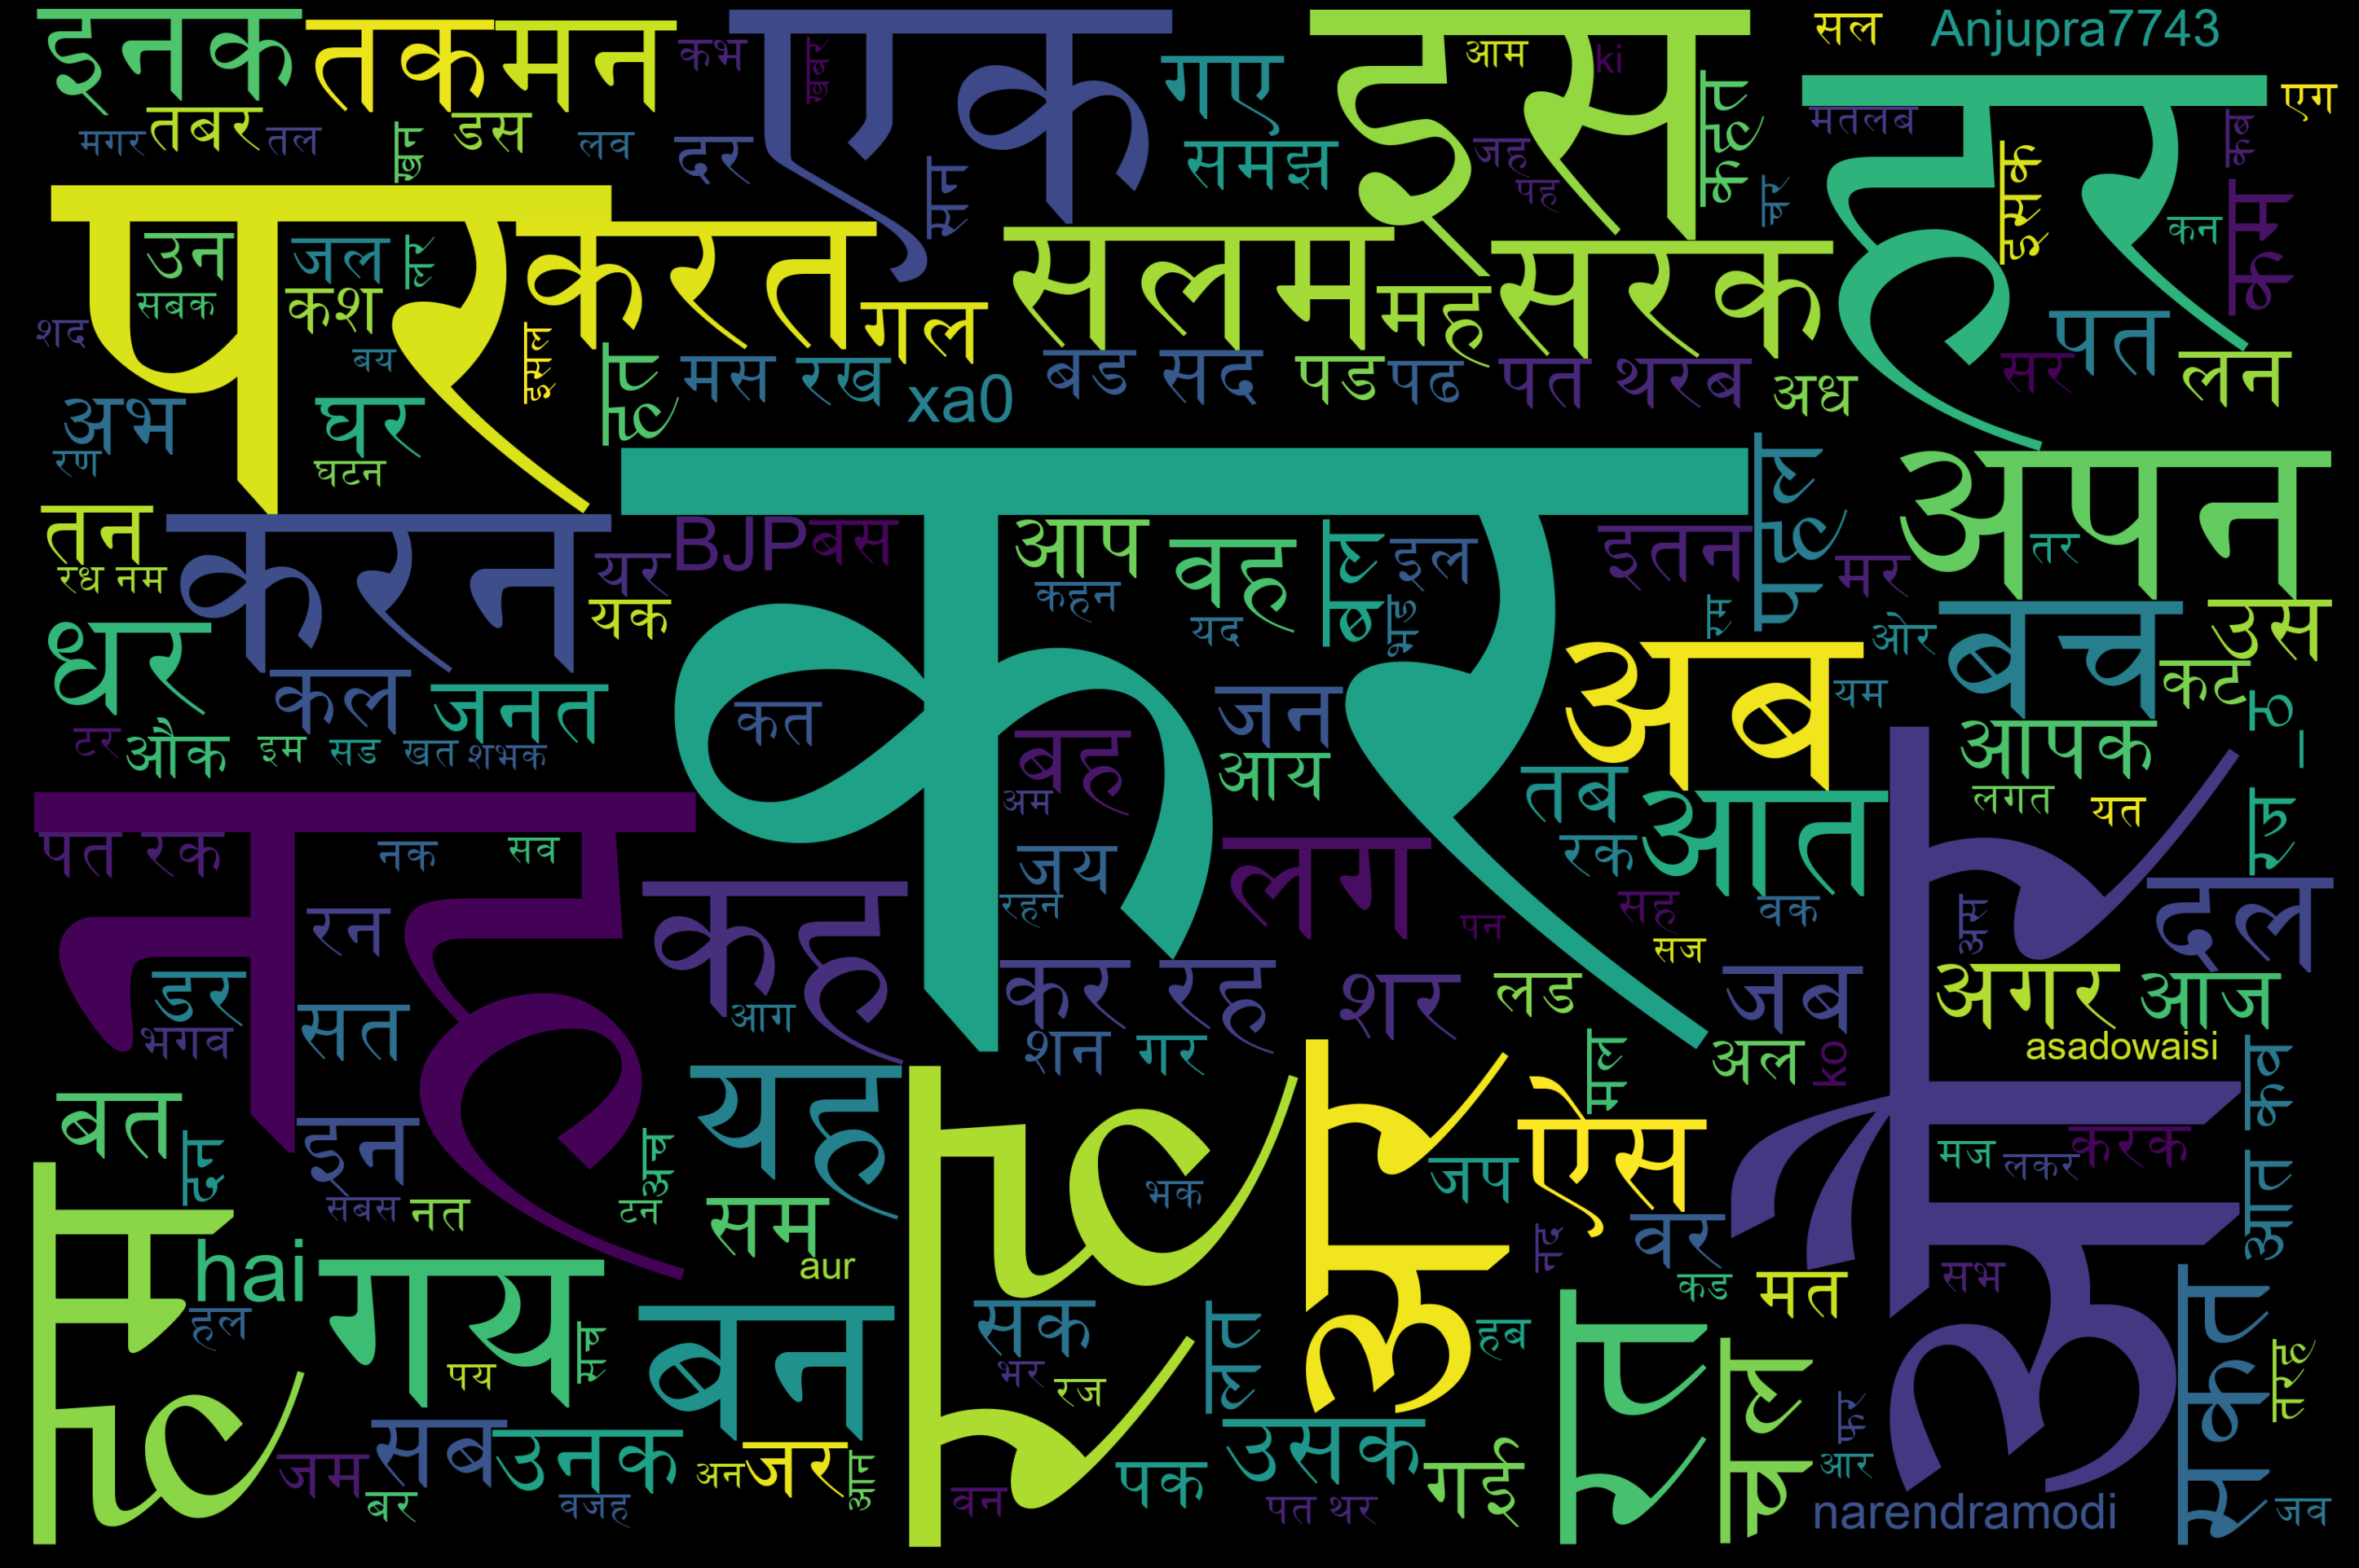

In [12]:
plot_hindi_word_cloud(HATE)

word cloud for profain content

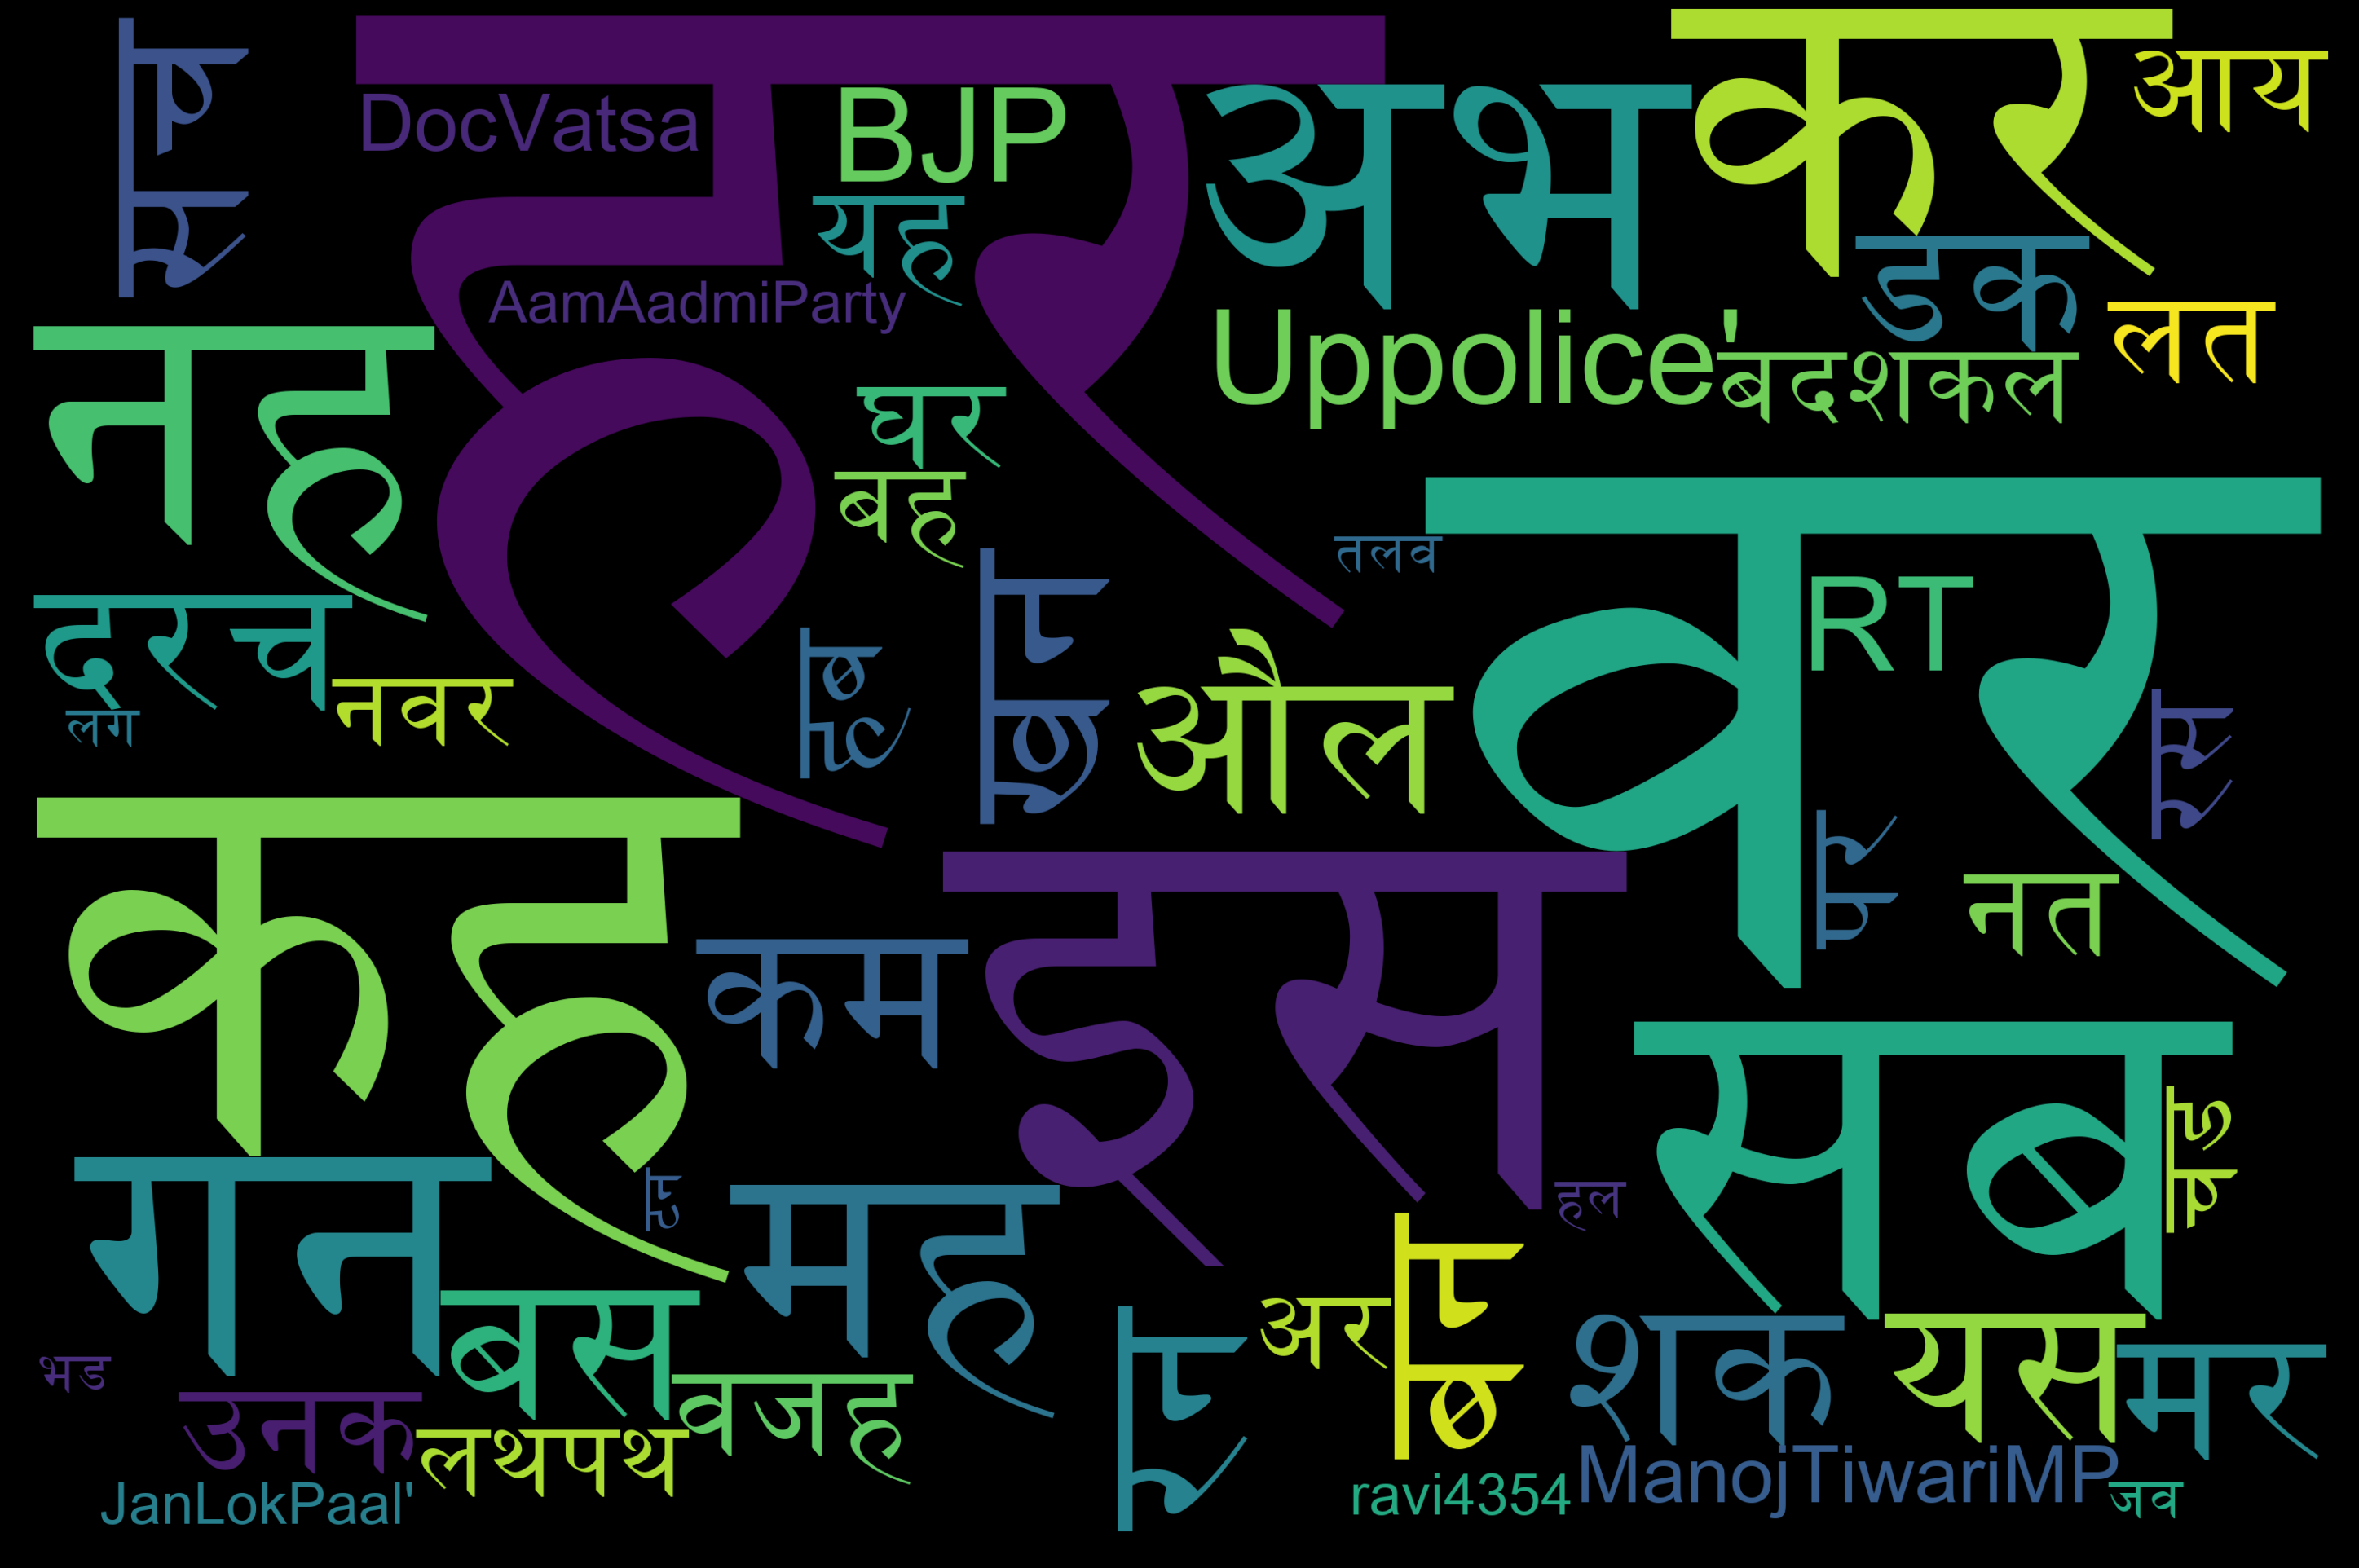

In [13]:
plot_hindi_word_cloud(PRFN)

word cloud for offensive content

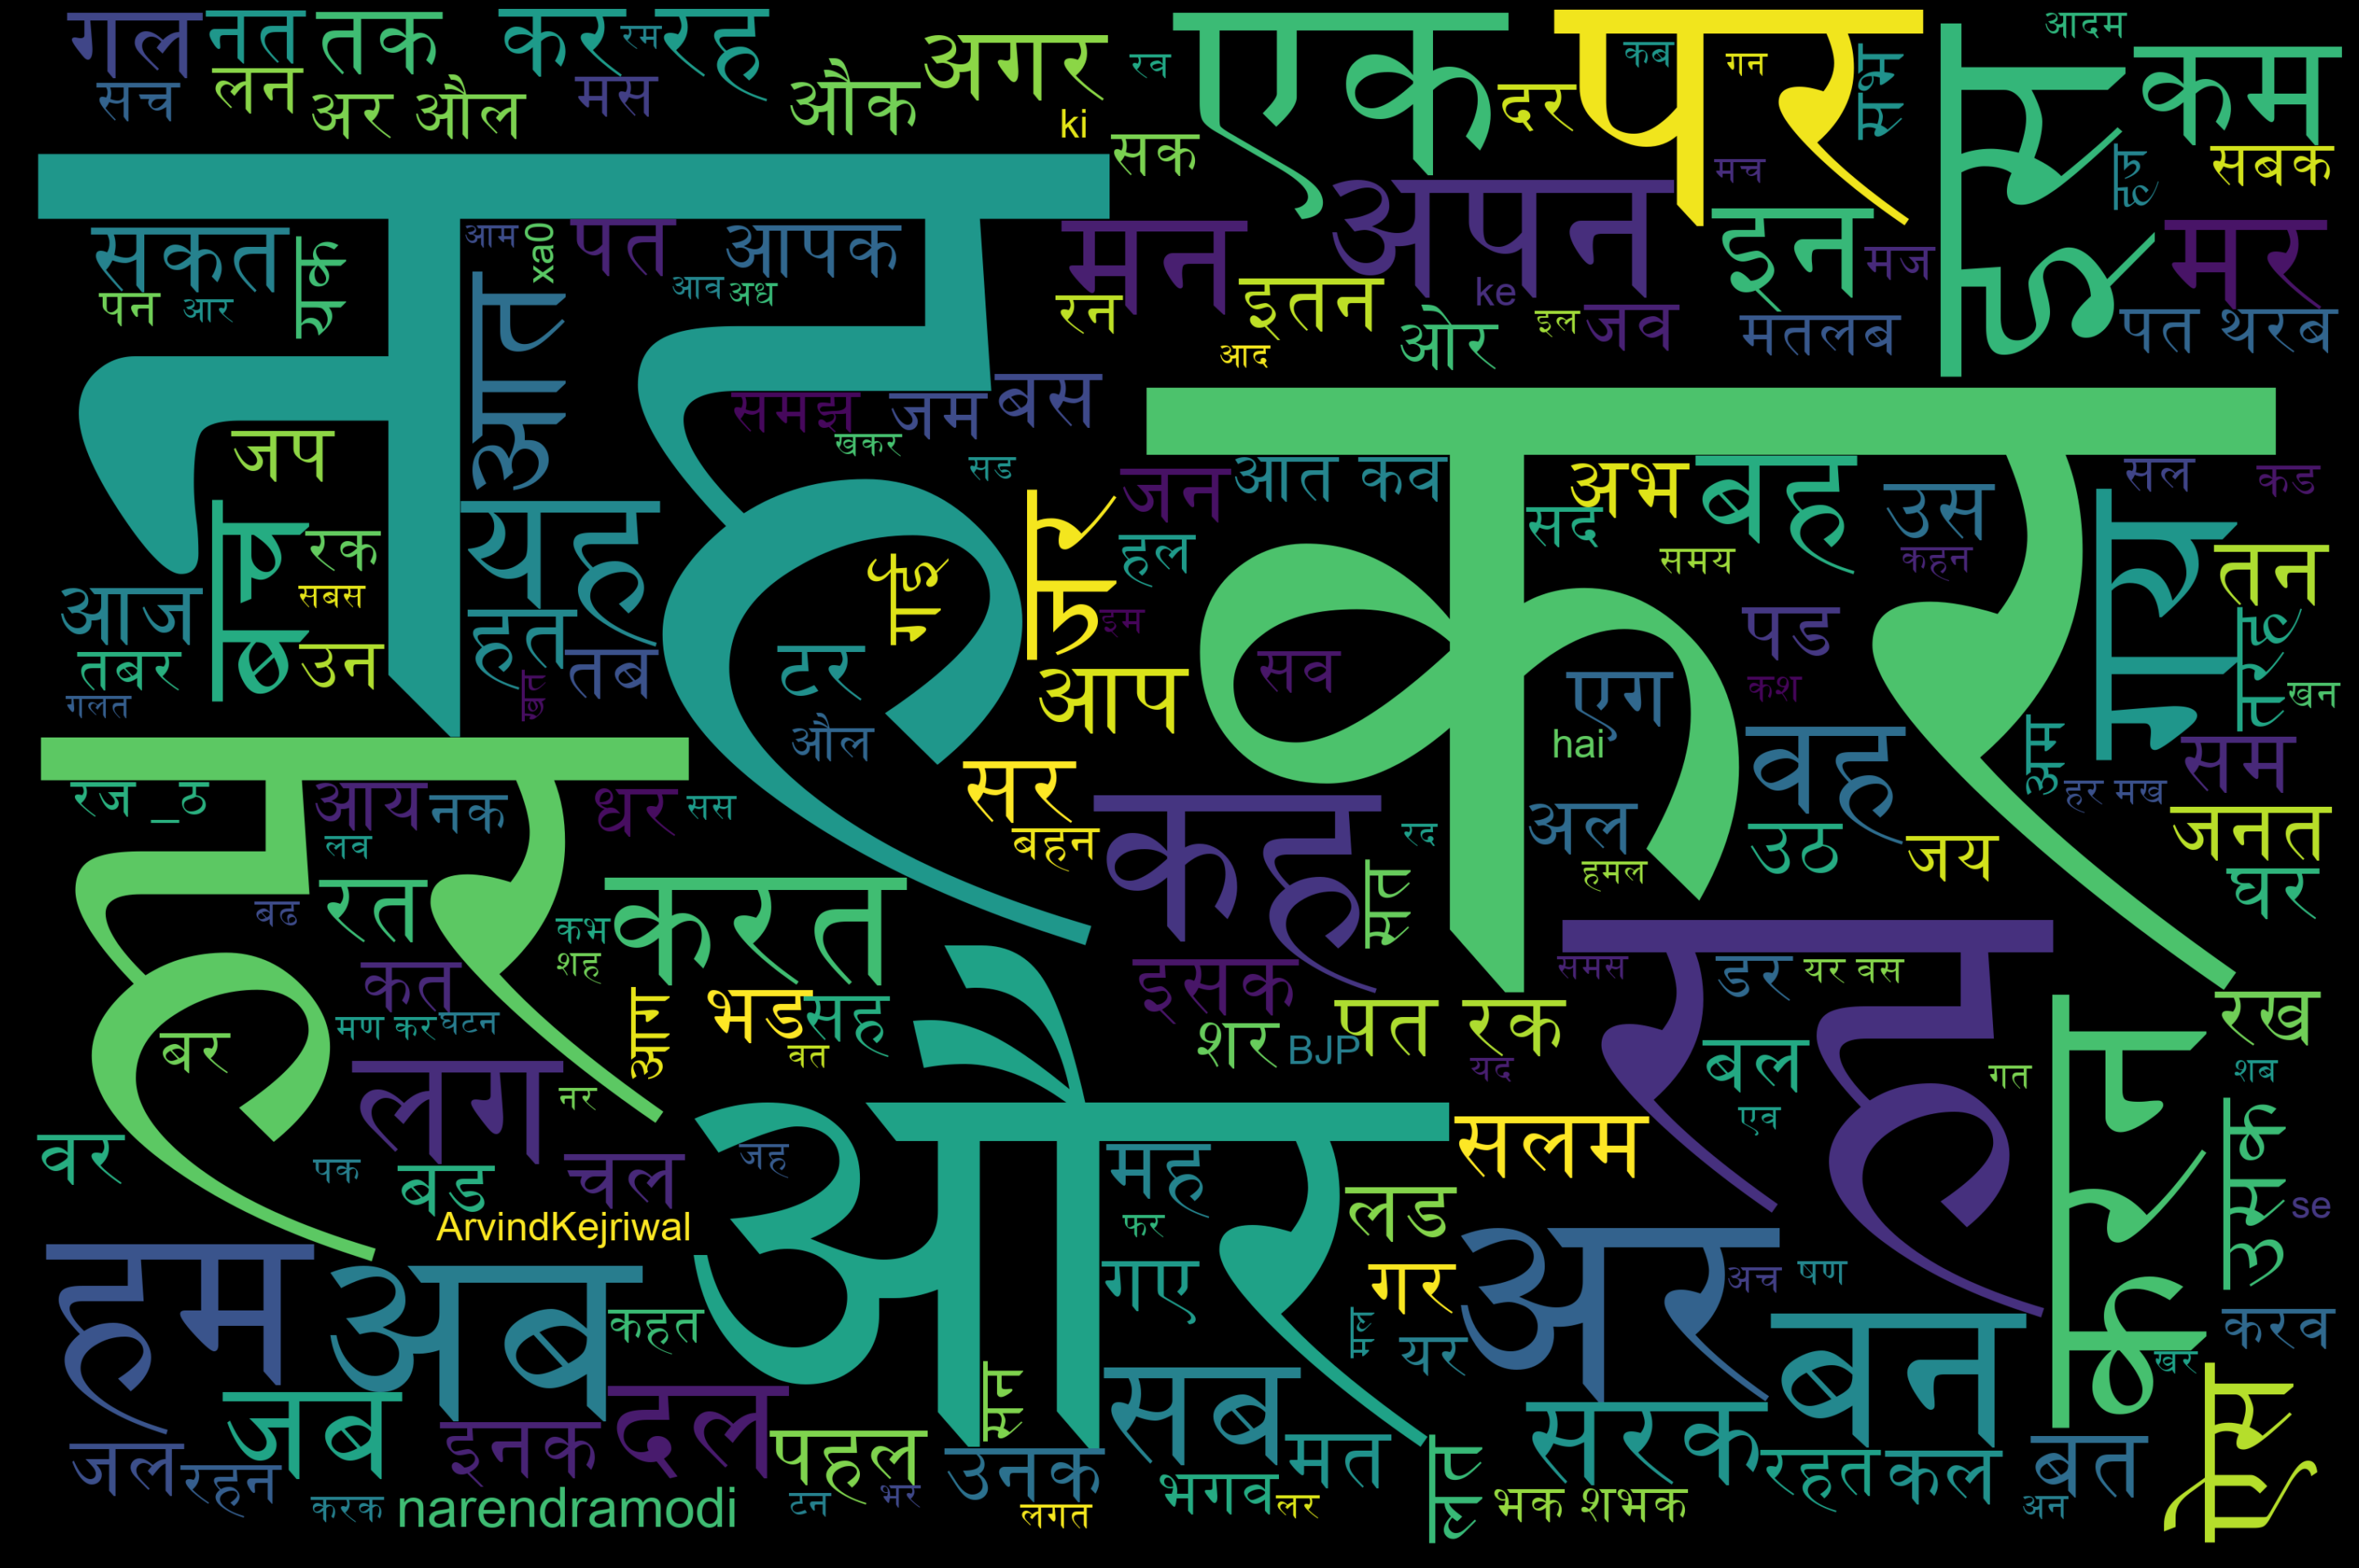

In [14]:
plot_hindi_word_cloud(OFFN)

## Sub-task C
Sub-task c will check the type of offense. Only posts labeled as HOF in sub-task A are included in sub-task C. The two categories in sub-task C are the following: 

* Targeted Insult (TIN): Posts containing an insult/threat to an individual, group, or others.
* Untargeted (UNT): Posts containing nontargeted profanity and swearing. Posts with general profanity are not targeted, but they contain non-acceptable language.

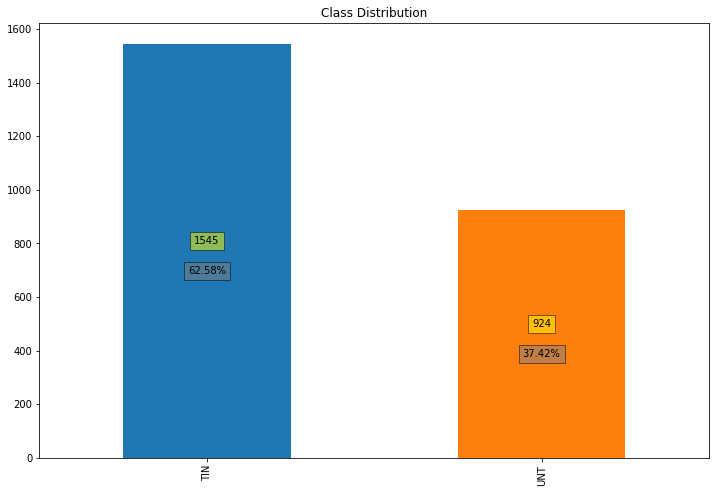

In [15]:
plot_data(hof, "task_3")

In [16]:
TIN = hof[(hof['task_3'] == 'TIN')]
UNT = hof[(hof['task_3'] == 'UNT')]

word cloud for targeted insults

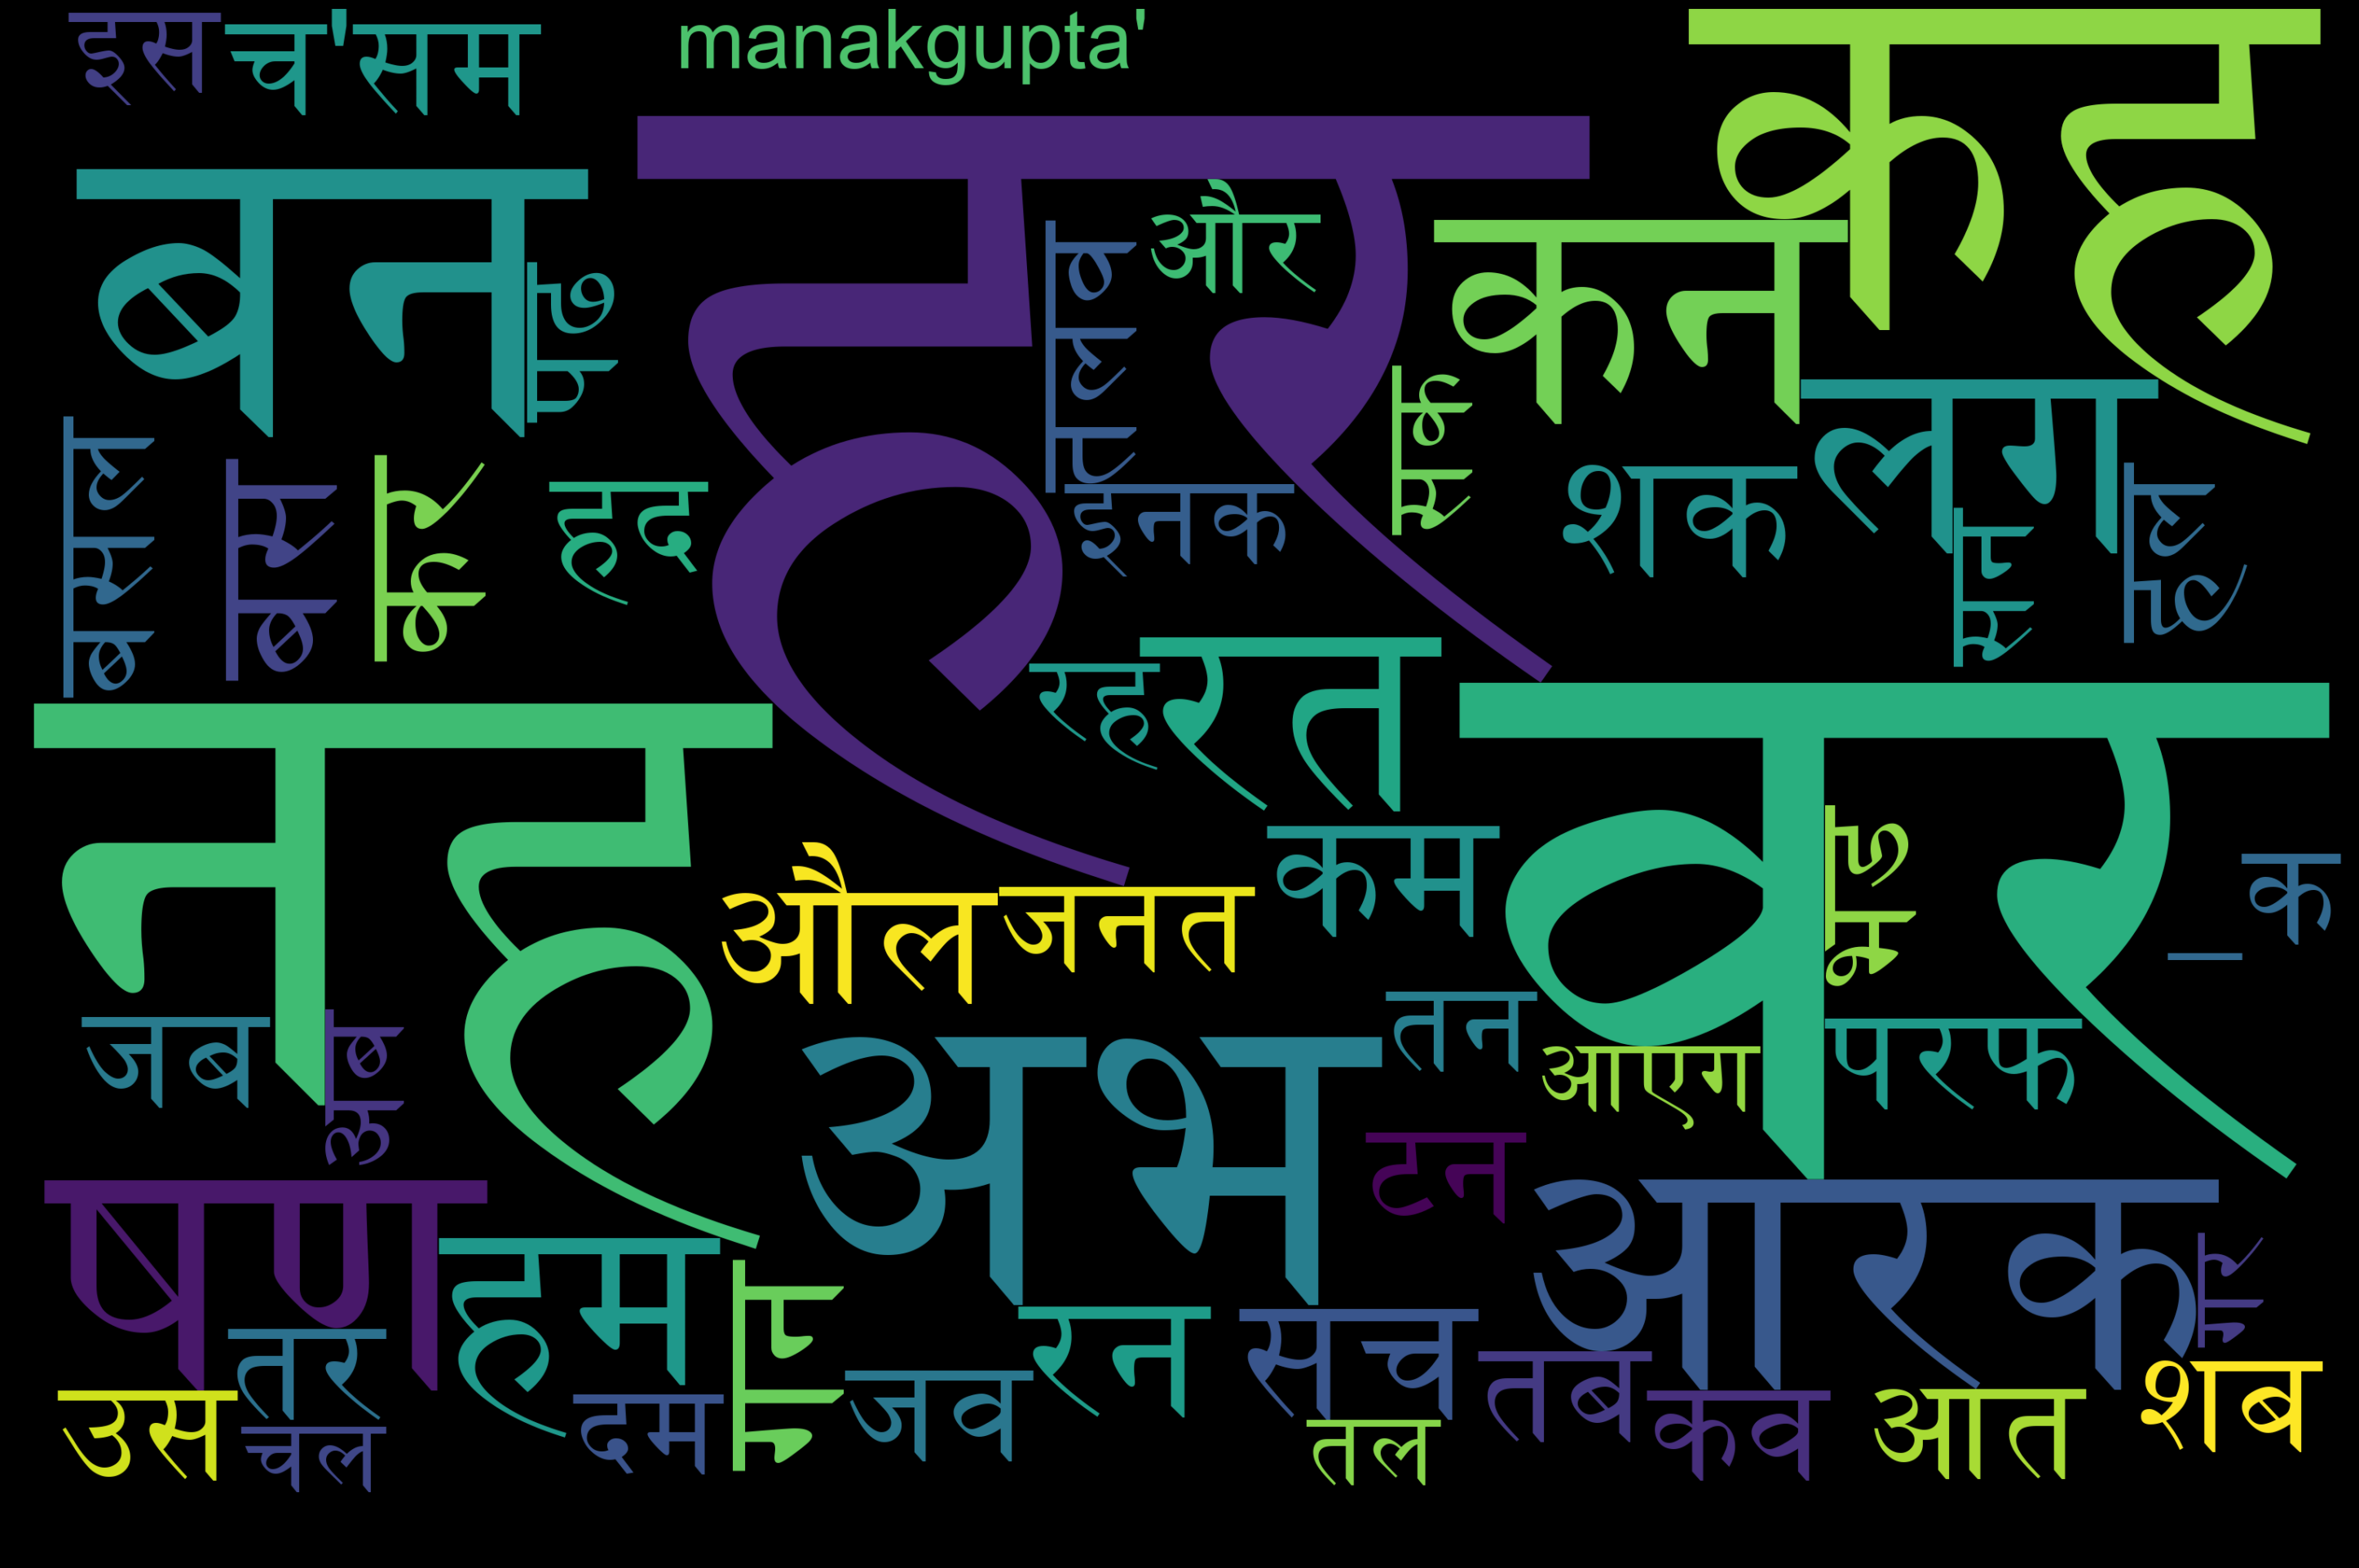

In [17]:
plot_hindi_word_cloud(TIN)

word cloud for untargeted insults

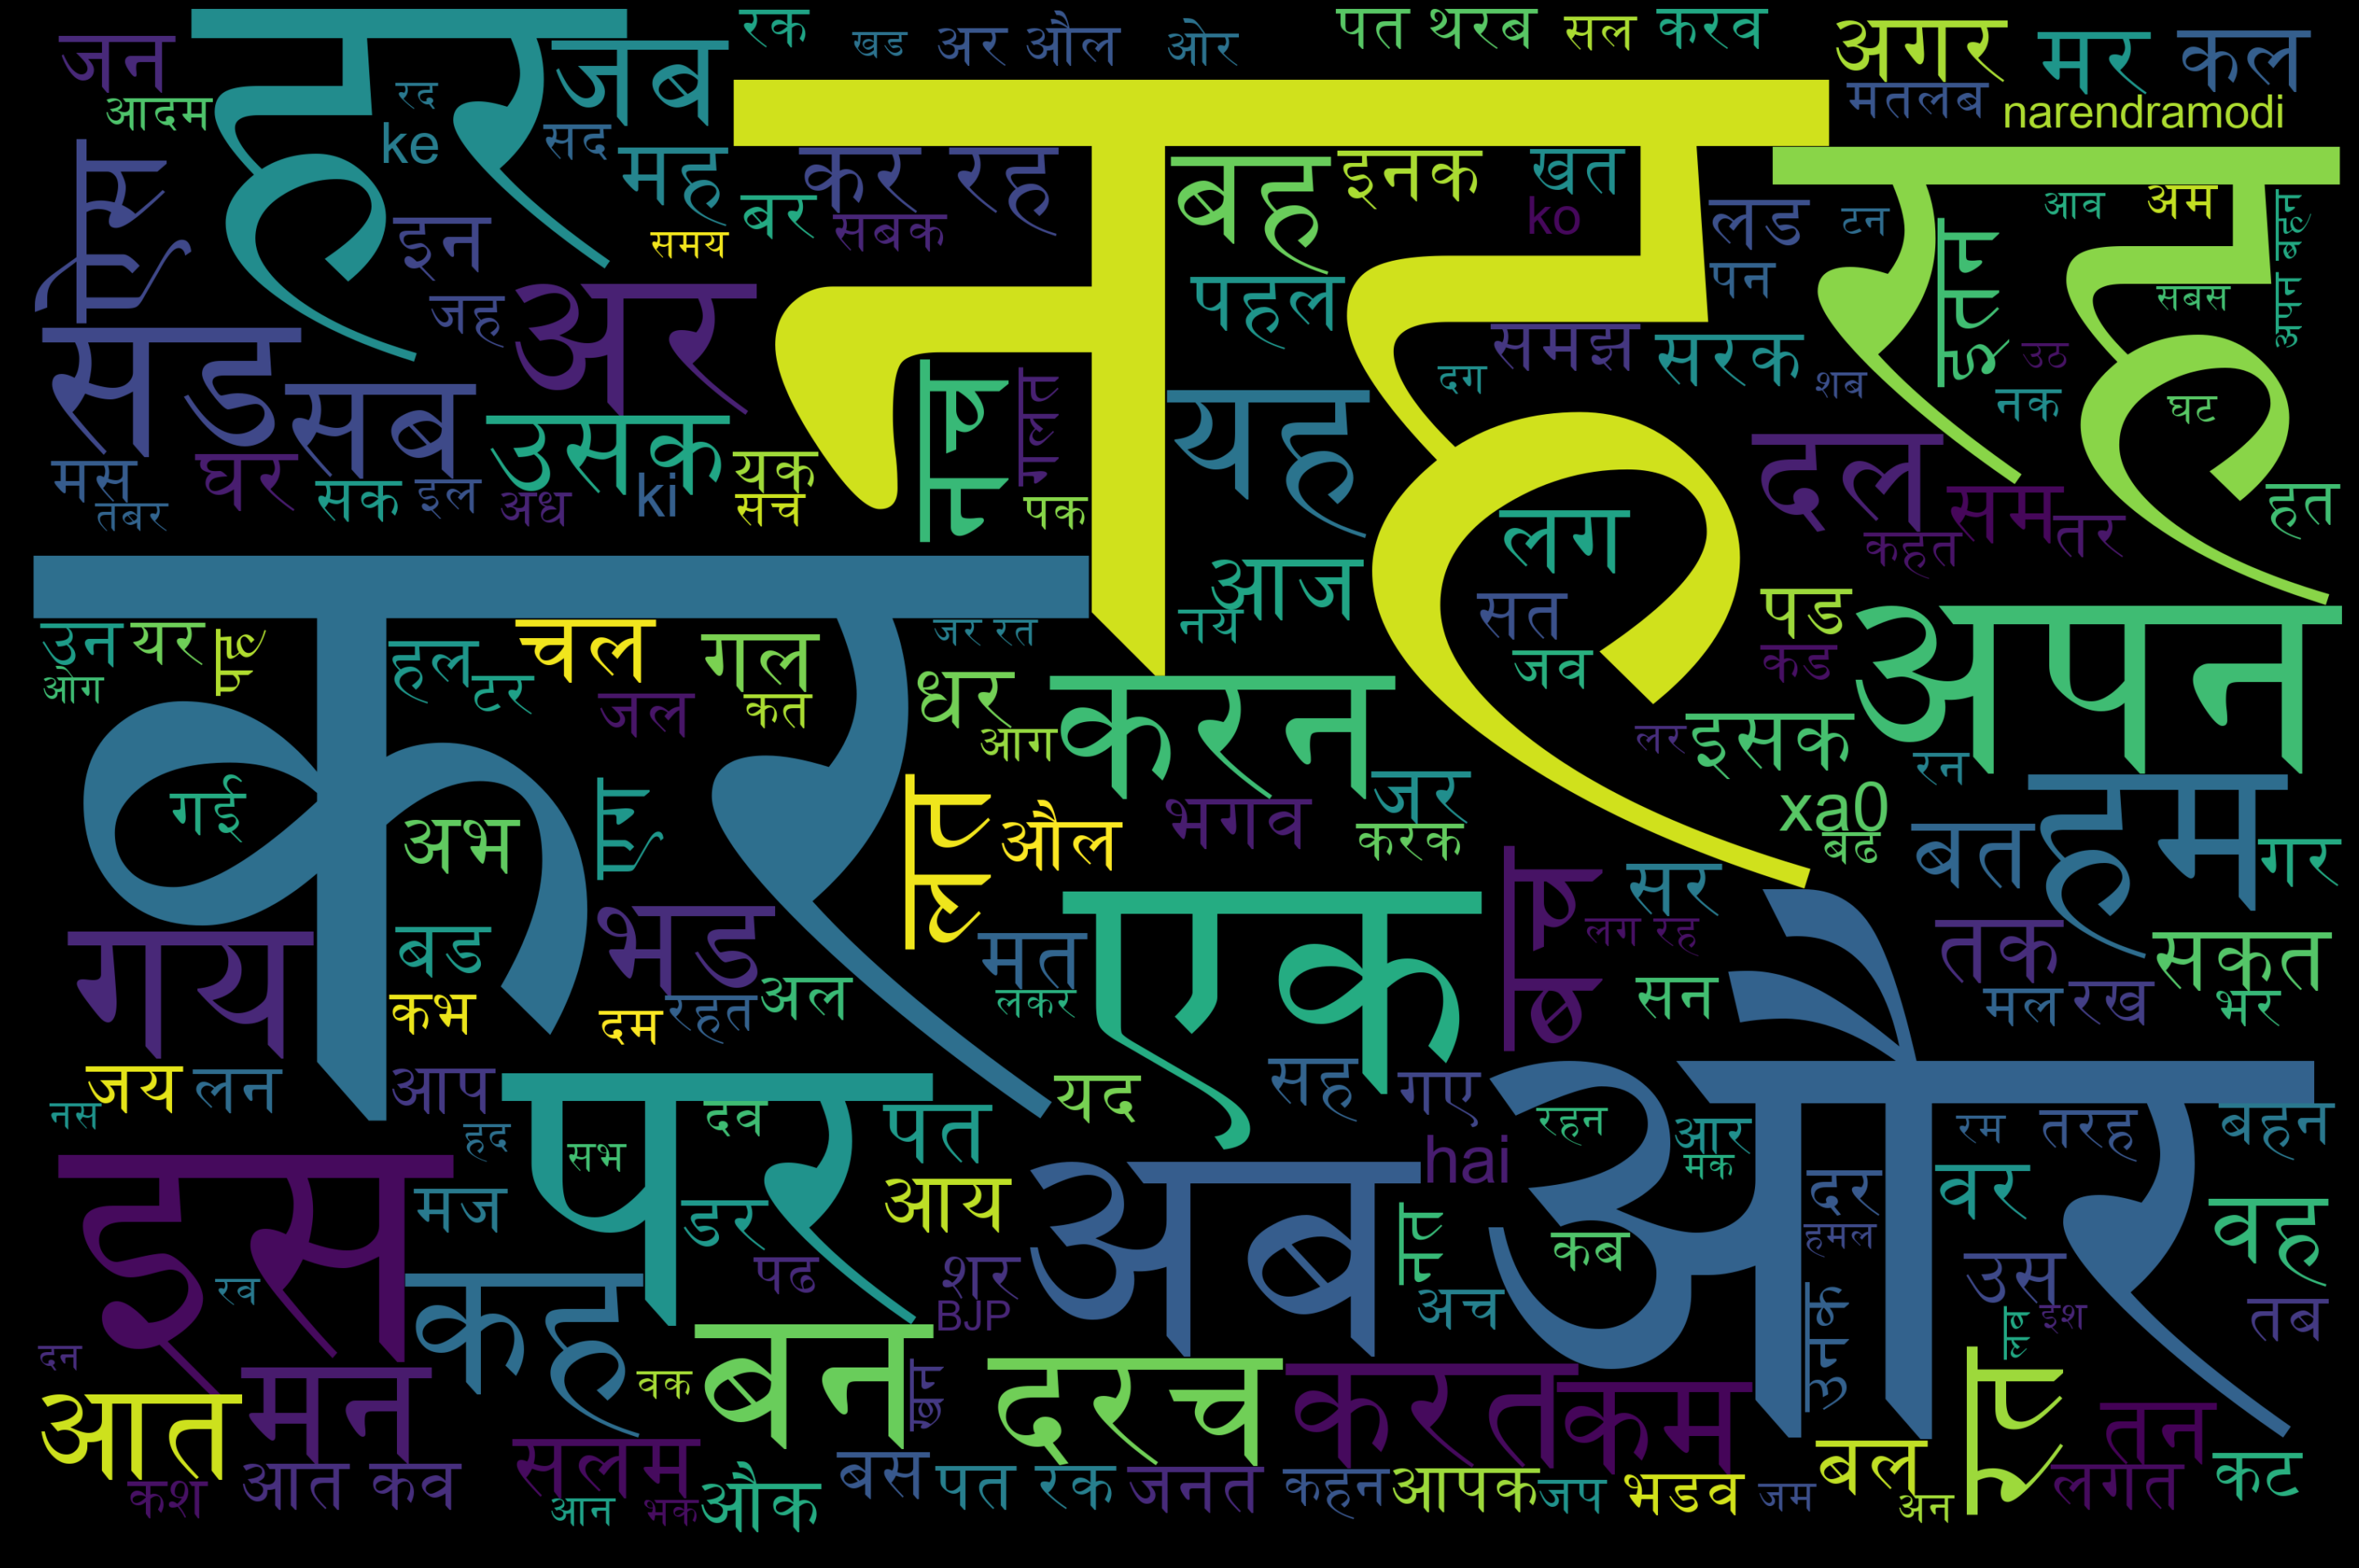

In [18]:
plot_hindi_word_cloud(UNT)